# Explore the Enriched ToposText Annotation in Book 4

We explored the CSV file containing the annotation in ToposText Book 4 enriched by Flair NER (2,508 annotations). The most annotated is chapter 18 with 266 annotations, followed by chapter 23 and chapter 17 with 183 and 148 annotations.

1,301 annotations are labelled as "place', 418 as 'LOC', 206 as 'MISC', 164 as 'ethnic', 43 as 'demonym', 4 as 'ORG', 3 as 'person' and 3 as 'PER'. 366 annotations were not associated to a Class (these cases were already present in ToposText).

997 annotations do not contain a ToposText ID.

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
## open the file containing the enriched ToposText annotation in Book 4 (2,508 rows)
Enriched_ToposText_Book4 = pd.read_csv("/Users/u0154817/OneDrive - KU Leuven/Documents/KU Leuven/PhD project 'Greek Spaces in Roman Times'/Data_Extraction/Outputs/1.7.Enriched_ToposText_Book4.csv", delimiter=",")

In [3]:
len(Enriched_ToposText_Book4)

2508

# 1.8.1 Reference Column

The most annotated is chapter 18 with 266 annotations, followed by chapter 23 and chapter 17 with 183 and 148 annotations.

In [4]:
## get the chapter from each reference

Column_Chapter=[] ## create a new list of chapters

for i, Reference in enumerate(Enriched_ToposText_Book4["Reference"]):
    
    Pattern=r"urn:cts:latinLit:phi0978\.phi001:4.(\d+)(?:\.(\d))?\." ## match the reference pattern
    Match=re.search(Pattern,Reference)
    Column_Chapter.append(int(Match[1])) ## extract the chapter

Enriched_ToposText_Book4["Chapter"]=Column_Chapter
Enriched_ToposText_Book4["Chapter"].value_counts().head(10)

18    266
23    183
17    148
26    144
19    126
20    122
35    110
12     90
27     84
24     83
Name: Chapter, dtype: int64

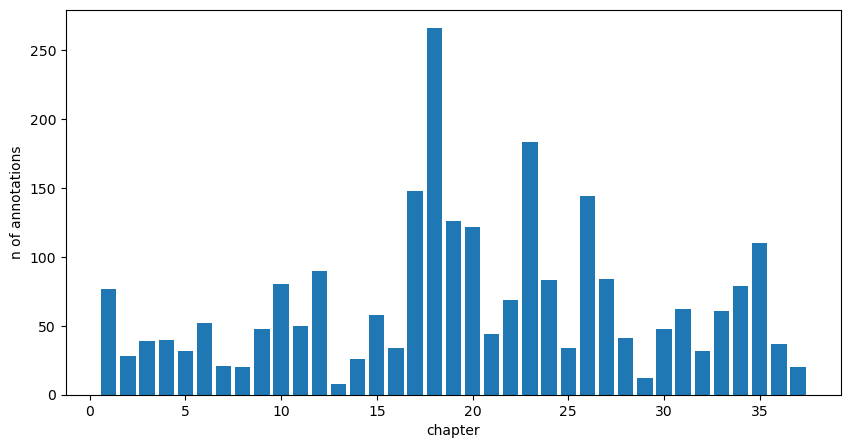

In [5]:
## plot the distribution of enriched ToposText annotations in Book 4

plt.figure(figsize=(10, 5))

## count the unique values in Chapter column
counts = Enriched_ToposText_Book4["Chapter"].value_counts()

## sort the counts dictionary by key in ascending order
sorted_counts = dict(sorted(counts.items()))

## plot the sorted counts as a bar plot
plt.bar(sorted_counts.keys(), sorted_counts.values())

plt.xlabel('chapter')
plt.ylabel('n of annotations')

## show the plot
plt.show()

# 1.8.2 Class Column

1,301 annotations are labelled as "place', 418 as 'LOC', 206 as 'MISC', 164 as 'ethnic', 43 as 'demonym', 4 as 'ORG', 3 as 'person' and 3 as 'PER'. 366 annotations were not associated to a Class (these cases were already present in ToposText).

In [6]:
Enriched_ToposText_Book4["Class"].value_counts()

['place']      1301
LOC             418
MISC            206
['ethnic']      164
['demonym']      43
ORG               4
PER               3
['person']        3
Name: Class, dtype: int64

In [7]:
## count the number of NaN values in the 'Class' column
Nan_Values_Class = Enriched_ToposText_Book4["Class"].isna().sum()
Nan_Values_Class

366

# 1.8.3 ToposText ID Column

997 annotations do not contain a ToposText ID.

In [8]:
## count the number of NaN values in the 'ToposText ID' column
Nan_Values_ToposTextID = Enriched_ToposText_Book4["ToposText ID"].isna().sum()
Nan_Values_ToposTextID

997